In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("stroke_data.csv")

df.head()




,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [119]:
# df[df['bmi'].isna()]  to find rows with N/A in 'bmi' column
#  df.mean() All means ignoring N/A

bmi_mean=df['bmi'].mean() ### mean of a specific colum ignoring N/A

df['bmi']=df['bmi'].fillna(bmi_mean)  # filling N/A in with the mean of 'bmi' columns




In [120]:
print(df.columns)

x=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
y=df[['stroke']]


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [121]:
#To scale and encode

numerical=['age','avg_glucose_level', 'bmi']
categorical=['gender','ever_married','work_type', 'Residence_type','smoking_status']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ct=ColumnTransformer([
    ('cat',OneHotEncoder(),categorical),
    ('num',StandardScaler(),numerical),
])

In [104]:
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test=split(x,y,test_size=0.2)

x_train=ct.fit_transform(x_train)
x_test=ct.transform(x_test)

C:\Users\ruksh\AppData\Local\Temp\ipykernel_16200\815238482.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train,y_train)


<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000019A7F6FED90> 0.952054794520548


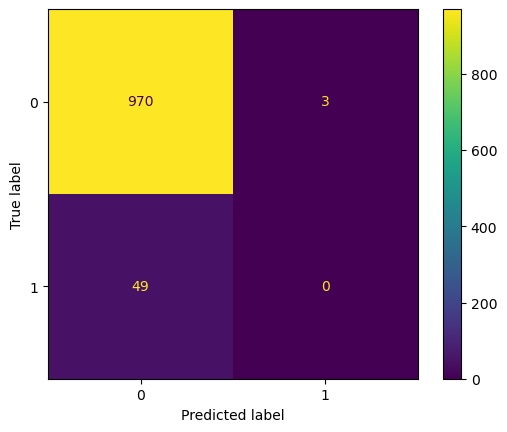

In [107]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=2, random_state=42)
model1.fit(x_train,y_train)

y_pred=model1.predict(x_test)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
classification_results=classification_report(y_test,y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
accuracy_score(y_test,y_pred)

print(cm,ac)

## Correcting Imbalance Dataset

Lets try to correct the imbalance in the y varaible by following

1) Undersampling (decreasing the number in majority group)

2) Oversampling (increrasing the number in minority group)



In [85]:
#checking imbalance

y.value_counts()

stroke
0         4861
1          249
dtype: int64

<AxesSubplot:ylabel='None'>

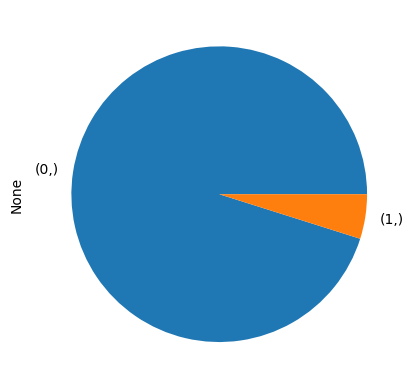

In [86]:
y.value_counts().plot.pie()

In [78]:
# Undersampling

# !pip install imblearn

from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy="not minority")
x_res,y_res = rus.fit_resample(x,y)

y_res.value_counts()

stroke
0         249
1         249
dtype: int64

<AxesSubplot:ylabel='None'>

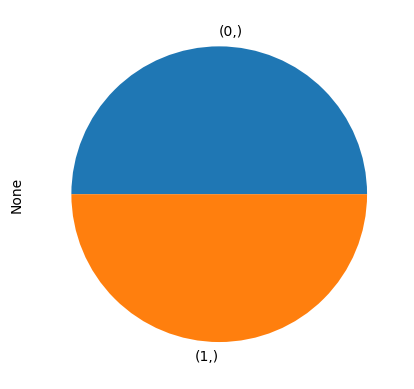

In [88]:
y_res.value_counts().plot.pie()

In [89]:
from sklearn.model_selection import train_test_split as split
x_res_train,x_res_test,y_res_train,y_res_test=split(x_res,y_res,test_size=0.2)

x_res_train=ct.fit_transform(x_res_train)
x_res_test=ct.transform(x_res_test)

C:\Users\ruksh\AppData\Local\Temp\ipykernel_16200\2906850062.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_res_train, y_res_train)


0.78

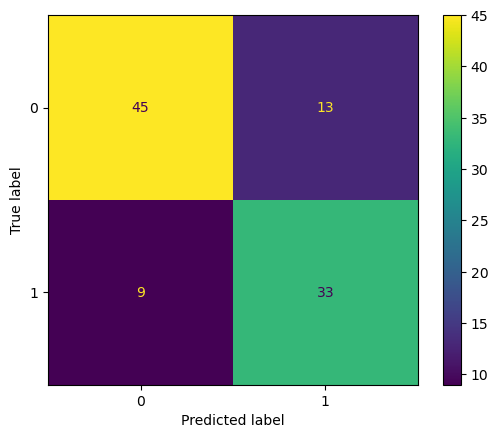

In [112]:
# Random Forest Regression

from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=250, min_samples_split=2, criterion='gini',random_state=42)
model2.fit(x_res_train, y_res_train)

y_res_pred=model2.predict(x_res_test)

ConfusionMatrixDisplay.from_predictions(y_res_test, y_res_pred)
accuracy_score(y_res_test, y_res_pred)

In [117]:
# Oversampling

from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy='not majority')
x_ros, y_ros= ros.fit_resample(x, y)

y_ros.value_counts()

stroke
0         4861
1         4861
dtype: int64

In [122]:
from sklearn.model_selection import train_test_split as split
x_ros_train,x_ros_test,y_ros_train,y_ros_test=split(x_ros,y_ros,test_size=0.2)

x_ros_train=ct.fit_transform(x_ros_train)
x_ros_test=ct.transform(x_ros_test)

C:\Users\ruksh\AppData\Local\Temp\ipykernel_16200\397935711.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_ros_train, y_ros_train)


0.987146529562982

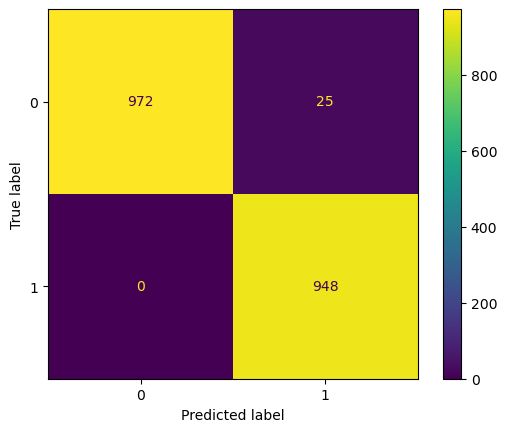

In [123]:
# Random Forest Regression

model3=RandomForestClassifier(n_estimators=250, min_samples_split=2, criterion='gini',random_state=42)
model3.fit(x_ros_train, y_ros_train)

y_ros_pred=model3.predict(x_ros_test)

ConfusionMatrixDisplay.from_predictions(y_ros_test, y_ros_pred)
accuracy_score(y_ros_test, y_ros_pred)